In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [3]:

pr = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/GCM/MIROC5/pr_Amon_MIROC5_historical_r1i1p1_185001-201212.nc')

pr




<xarray.Dataset>
Dimensions:    (time: 1956, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2012-12-16 12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [4]:
#changing time dim to datetime64[ns] dtype

datetimeindex = pr.indexes['time'].to_datetimeindex()
pr['time']=datetimeindex
pr

/home/mkibria/miniconda3/envs/esp-sp/lib/python3.9/site-packages/xarray/coding/times.py:351: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  sample = dates.ravel()[0]
/tmp/ipykernel_25907/3522490540.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = pr.indexes['time'].to_datetimeindex()


<xarray.Dataset>
Dimensions:    (time: 1956, bnds: 2, lat: 128, lon: 256)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2012-12-16T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2013-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.28 -88.28 ... 88.28 88.28 90.0
    lon_bnds   (lon, bnds) float64 -0.7031 0.7031 0.7031 ... 357.9 357.9 359.3
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [5]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))


In [6]:
pr= pr.sel(lon=slice(86,94),lat=slice(18,27))
pr

<xarray.Dataset>
Dimensions:    (time: 396, bnds: 2, lat: 6, lon: 5)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-16T12:00:00 ... 2012-12-16T12:00:00
  * lat        (lat) float64 18.91 20.31 21.71 23.11 24.51 25.91
  * lon        (lon) float64 87.19 88.59 90.0 91.41 92.81
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1980-01-01 00:00:00 ... 2013-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 18.21 19.61 19.61 21.01 ... 25.21 25.21 26.62
    lon_bnds   (lon, bnds) float64 86.48 87.89 87.89 89.3 ... 92.11 92.11 93.52
    pr         (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            AORI (Atmosphere and Ocean Research Institute, Th...
    institute_id:           MIROC
    experiment_id:          historical
    source:                 MIROC5 2010 atmosphere: MIROC-AGCM6 (T85L40); oce...
    model_id:               MIROC5
    forcing:                GHG, SA, Oz, LU, Sl, Vl, SS, Ds, BC, MD, OC (GHG ...
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  MIROC5 model output prepared for CMIP5 historical
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.5.6

In [7]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [8]:
size = pr.pr.shape
print(size)


(396, 6, 5)


In [9]:
for time in range(size[0]):
        data = pr.pr[time,Ellipsis] * spd
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

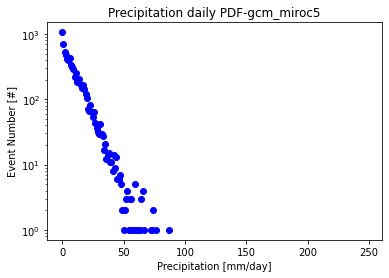

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-gcm_miroc5')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_gcm_miroc5.png")



plt.show( )